# ploting a sigmoid function

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

#sigmoid looks like 
    $S_{w,b}(x) =  \frac{1}{1+e^{-{wx+b}}}$ 

In [3]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [4]:
sigmoid(1,0.5,0)

0.6224593312018546

In [5]:
w = 0.9
b=0.1
X=np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

In [6]:
Y

array([1.36370327e-04, 1.63557591e-04, 1.96163940e-04, 2.35269063e-04,
       2.82167560e-04, 3.38411631e-04, 4.05862205e-04, 4.86750155e-04,
       5.83749582e-04, 7.00065487e-04, 8.39538625e-04, 1.00677082e-03,
       1.20727464e-03, 1.44765201e-03, 1.73580713e-03, 2.08119997e-03,
       2.49514769e-03, 2.99118223e-03, 3.58547383e-03, 4.29733104e-03,
       5.14978940e-03, 6.17030137e-03, 7.39154134e-03, 8.85233891e-03,
       1.05987527e-02, 1.26852942e-02, 1.51763055e-02, 1.81474856e-02,
       2.16875463e-02, 2.58999564e-02, 3.09047040e-02, 3.68399635e-02,
       4.38634985e-02, 5.21535631e-02, 6.19089754e-02, 7.33479467e-02,
       8.67051530e-02, 1.02226463e-01, 1.20160718e-01, 1.40748033e-01,
       1.64204313e-01, 1.90702102e-01, 2.20348548e-01, 2.53162097e-01,
       2.89050497e-01, 3.27793485e-01, 3.69033898e-01, 4.12280596e-01,
       4.56925222e-01, 5.02272712e-01, 5.47582842e-01, 5.92117819e-01,
       6.35189527e-01, 6.76200172e-01, 7.14671494e-01, 7.50260106e-01,
      

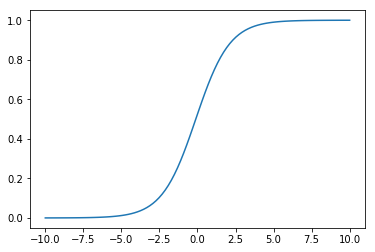

In [7]:
plt.plot(X,Y)

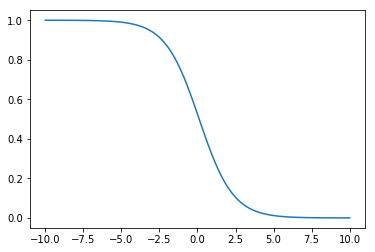

In [8]:
#w=-w
w=-0.9
Y=sigmoid(X,w,b)
plt.plot(X,Y)

# plotting a 3D sigmoid
#sigmoid looks like 
    $S_{w,b}(x) =  \frac{1}{1+e^{-{w_1x_1+ w_2x_2+b}}}$ 

In [9]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [10]:
!pip install mpl_toolkits
from mpl_toolkits import mplot3d

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [11]:
X1= np.linspace(-10,10,100)
X2 =  np.linspace(-10,10,100)

In [12]:
print(sigmoid_2d(1,0,0.5,0,0))
XX1,XX2 =  np.meshgrid(X1,X2)

0.6224593312018546


In [82]:
print(XX1.shape,XX2.shape)
w1=0.5
w2=-0.5
b=0

(100, 100) (100, 100)


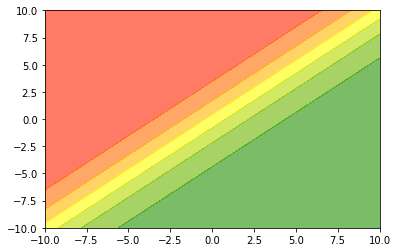

In [83]:
Y =  sigmoid_2d(XX1,XX2,w1,w2,b)
#computer contour plot here

#defineing my  cmap
my_cmap = col.LinearSegmentedColormap.from_list("  ",["red","yellow","green"])
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6)

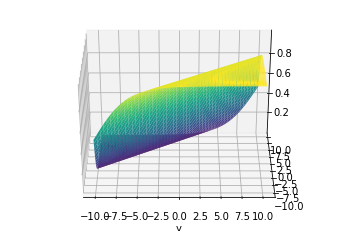

In [84]:
fig =  plt.figure()
ax  = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_xlabel('x2')
ax.set_xlabel('y')


#view_init function is used to view from which angle you are view it
ax.view_init(30,270)

# compute a loss for given dataset


In [85]:
w_unknown =  0.5
b_unknown =  0.25

X = np.random.random(25) * 20 - 10 
Y = sigmoid(X,w_unknown,b_unknown)

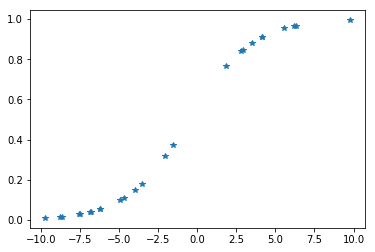

In [86]:
plt.plot(X,Y,'*')

In [87]:
W  = np.linspace(-1,1,100)
B  = np.linspace(-1,1,100)
WW,BB =  np.meshgrid(W,B)

In [88]:
def calculate_loss(X,Y,w_est, b_est):
    loss =0
    for x,y in zip(X,Y):
        loss  += y-sigmoid(x,w_est,b_est)**2
    return loss

In [89]:

Loss  = np.zeros(WW.shape)

for i in range(WW.shape[0]):
    for j in range(BB.shape[0]):
        Loss[i,j] =  calculate_loss(X,Y,WW[i][j],BB[i][j])

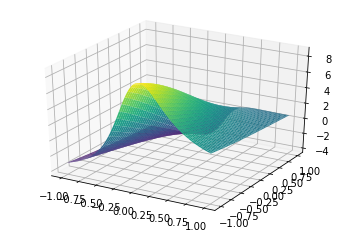

In [90]:
fig = plt.figure()
ax  = plt.axes(projection='3d') 
ax.plot_surface(WW,BB,Loss,cmap='viridis')

# class for sigmoid Neurons

In [91]:
class sigmoidNeurons:
    def __init__(self):
        self.w=None
        self.b=None
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    def fit(self,X,Y,epochs=1,learning_rate=1.0,initialise=True):
        #initialize w,b
        if initialise:
            self.w = np.random.randn(1,X.shape[1])
            self.b=0
        for i  in range(epochs):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w-=learning_rate*dw
            self.b-=learning_rate*db

# fit for toy data

In [106]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y=[1,1,1,0,0,0]

In [107]:
sn = sigmoidNeurons()
sn.fit(X,Y,1,0.25,True)

In [108]:
#ploting a toy dataset here 
def plot_sn(X,Y,sn,ax):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1,XX2 = np.meshgrid(X1,X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val= np.asarray([X1[j],X2[i]])
            temp=sn.perceptron(val)
            YY[i, j] = sn.sigmoid(temp)
    ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
    ax.scatter(X[:,0],X[:,1])
    ax.plot()

In [111]:
print(sn.w,"-----------",sn.b)

[[ 1.49253541 -0.4884653 ]] ----------- [-0.52901194]


[[1.16498751 1.37494825]] -- [-0.00190753]
[[1.18271558 1.35606843]] -- [-0.00299496]
[[1.19898077 1.33668855]] -- [-0.00332956]
[[1.21408415 1.31657686]] -- [-0.00295074]
[[1.22827067 1.29549412]] -- [-0.00187474]
[[1.24174871 1.27317855]] -- [-9.68576374e-05]
[[1.25470474 1.24932948]] -- [0.00240851]
[[1.26731542 1.22358729]] -- [0.00568981]
[[1.27975914 1.19550674]] -- [0.00982254]
[[1.29222855 1.16451914]] -- [0.01491661]
[[1.30494633 1.12987648]] -- [0.02112813]
[[1.31818687 1.09056574]] -- [0.0286781]
[[1.33230855 1.04517409]] -- [0.03788227]
[[1.3478034  0.99167284]] -- [0.04919846]
[[1.36537267 0.92707442]] -- [0.06329949]
[[1.38602755 0.84693563]] -- [0.08117018]
[[1.41113881 0.74492866]] -- [0.10415024]
[[1.44197471 0.61407268]] -- [0.13345927]
[[1.4770341  0.45569235]] -- [0.16750531]
[[1.50664963 0.29728304]] -- [0.19644748]
[[1.51991386 0.16426939]] -- [0.20909225]
[[1.51715162 0.03880689]] -- [0.20539444]
[[ 1.50035409 -0.10535144]] -- [0.1866625]
[[ 1.47207429 -0.2819611

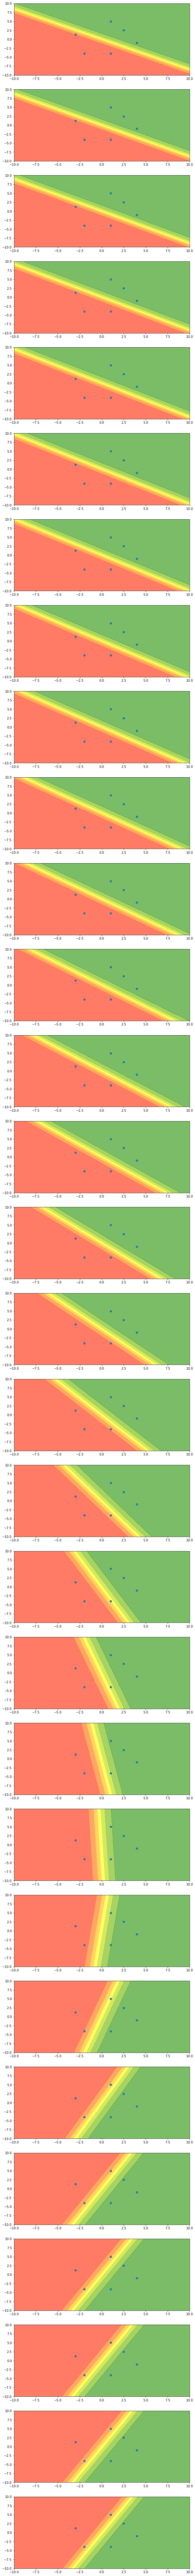

In [112]:
sn.fit(X,Y,1,0.25,True)
N=30
#ploting a multiple figure
plt.figure(figsize=(10,N*5))
for i in range(N):
    ax = plt.subplot(N,1,i+1)
    print(sn.w,"--",sn.b)
    plot_sn(X,Y,sn,ax)
    sn.fit(X,Y,1,0.25,False)

# Load Data

In [114]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

--2020-02-21 18:06:38--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/739uo8ebwbic9kb/mobile_cleaned.csv [following]
--2020-02-21 18:06:38--  https://www.dropbox.com/s/raw/739uo8ebwbic9kb/mobile_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2020-02-21 18:06:39 ERROR 404: Not Found.



In [115]:
import pandas as pd

In [116]:
data = pd.read_csv('mobile_clened.csv')

FileNotFoundError: [Errno 2] File b'mobile_clened.csv' does not exist: b'mobile_clened.csv'

In [ ]:
#to drop a col
X = data.drop('Rating',axis=1)
Y=data['Rating'].values

In [ ]:
#try to implement binary data problem
threshold =4
data['Class'] = (data['Rating'] >=threshold).astype(np.int)

# standardization
For standard data in ML. data have following propertise 1. for every column mean is 1 and standard deviation will be 1. the process of making a data a standard data is called standardization.

    sklearn.preprocessing.StandardScalar
    
    z=(x-u)/s

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler